In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
file_data = r'C:\Users\TP\Desktop\CarPricePredictorInTunisia\Data\CleanedData2.csv'

df = pd.read_csv(file_data)

In [64]:
print(df)

           Brand         Model  Price  Boite vitesse  Cylindrée  \
0     Alfa_Romeo        Giulia  198.0           True      1.995   
1     Alfa_Romeo       Stelvio  265.0           True      1.995   
2           Audi  A3_Sportback  145.0           True      1.395   
3           Audi    A3_Berline  149.0           True      1.395   
4           Audi            A4  198.0           True      1.984   
...          ...           ...    ...            ...        ...   
4849   Ssangyong         Kyron   38.0           True      3.000   
4850      Autres        Autres   50.0          False      1.600   
4851     Peugeot           206   18.0          False      2.400   
4852     Citroen            C4   35.0          False      1.600   
4853  Mitsubishi        Canter   40.0          False      1.200   

      Puissance fiscale  Kilométrage   Age  Essence  Diesel  Electric  
0                    11          0.0   0.0     True   False     False  
1                    17          0.0   0.0     True

Brand
Acrea          1
Alfa_Romeo     4
Audi          21
Autres         1
Baic_Yx        2
              ..
Tesla          1
Toyota        30
Volkswagen    32
Volvo          7
Wallyscar      4
Name: Model, Length: 67, dtype: int64


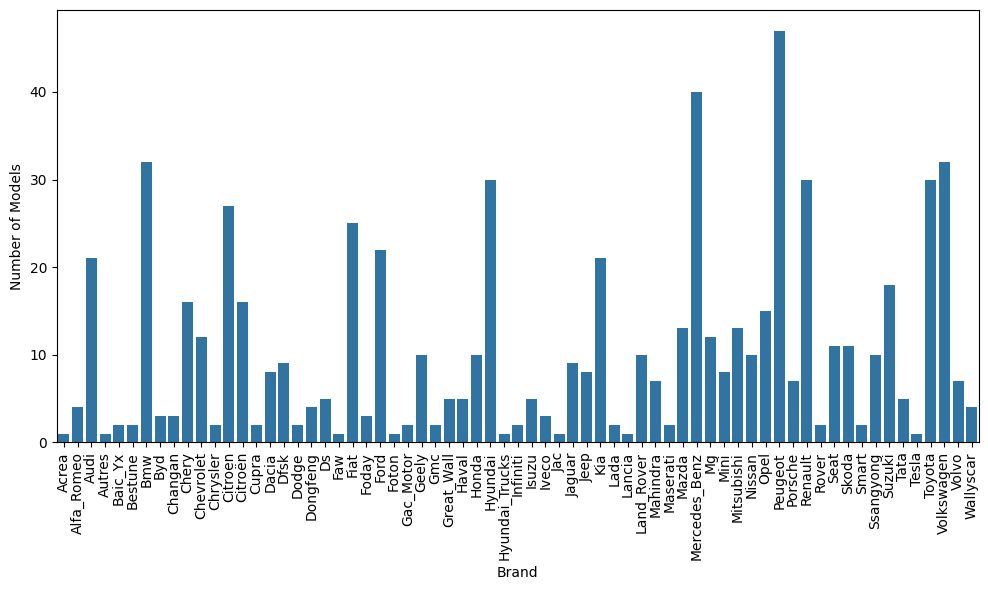

In [65]:
brand_model_counts = df.groupby("Brand")["Model"].nunique()

# Print the result to see the number of unique models per brand
print(brand_model_counts)

# Plot a bar chart showing the number of models for each brand
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_model_counts.index, y=brand_model_counts.values)

# Add labels and title to the plot
plt.xlabel("Brand")
plt.ylabel("Number of Models")

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

### Polynomial regression

In [66]:
# Step 1: Encode the 'Brand' column with unique integers (same as before)
brand_mapping = {brand: idx + 1 for idx, brand in enumerate(df['Brand'].unique())}
df['Brand_encoded'] = df['Brand'].map(brand_mapping)
print(brand_mapping)
print("-------")

# Step 2: Encode the 'Model' column with a hierarchical format (e.g., 1.1, 1.2, etc.)
model_mapping = {}
for brand in df['Brand'].unique():
    unique_models = df[df['Brand'] == brand]['Model'].unique()
    model_mapping_for_brand = {model: f"{brand_mapping[brand]}.{idx + 1}" for idx, model in enumerate(unique_models)}
    model_mapping[brand] = model_mapping_for_brand
print(model_mapping)
print("-------")

# Apply the model mapping to the dataframe
df['Model_encoded'] = df.apply(lambda row: model_mapping[row['Brand']][row['Model']], axis=1)

df = df.drop('Brand', axis=1)
df = df.drop('Model', axis=1)
#df = df.drop('Brand_encoded', axis=1)

# Display the DataFrame with encoded columns
print(df)

{'Alfa_Romeo': 1, 'Audi': 2, 'Bestune': 3, 'Bmw': 4, 'Byd': 5, 'Changan': 6, 'Chery': 7, 'Chevrolet': 8, 'Citroen': 9, 'Cupra': 10, 'Dacia': 11, 'Dfsk': 12, 'Dongfeng': 13, 'Faw': 14, 'Fiat': 15, 'Foday': 16, 'Ford': 17, 'Gac_Motor': 18, 'Geely': 19, 'Great_Wall': 20, 'Haval': 21, 'Honda': 22, 'Hyundai': 23, 'Jac': 24, 'Jaguar': 25, 'Jeep': 26, 'Kia': 27, 'Land_Rover': 28, 'Mahindra': 29, 'Mercedes_Benz': 30, 'Mg': 31, 'Mini': 32, 'Mitsubishi': 33, 'Nissan': 34, 'Opel': 35, 'Peugeot': 36, 'Porsche': 37, 'Renault': 38, 'Seat': 39, 'Skoda': 40, 'Ssangyong': 41, 'Suzuki': 42, 'Tata': 43, 'Toyota': 44, 'Volkswagen': 45, 'Volvo': 46, 'Wallyscar': 47, 'Citroën': 48, 'Mazda': 49, 'Infiniti': 50, 'Foton': 51, 'Isuzu': 52, 'Iveco': 53, 'Baic_Yx': 54, 'Lada': 55, 'Hyundai_Trucks': 56, 'Ds': 57, 'Dodge': 58, 'Tesla': 59, 'Gmc': 60, 'Maserati': 61, 'Autres': 62, 'Rover': 63, 'Smart': 64, 'Chrysler': 65, 'Acrea': 66, 'Lancia': 67}
-------
{'Alfa_Romeo': {'Giulia': '1.1', 'Stelvio': '1.2', 'Giuliett

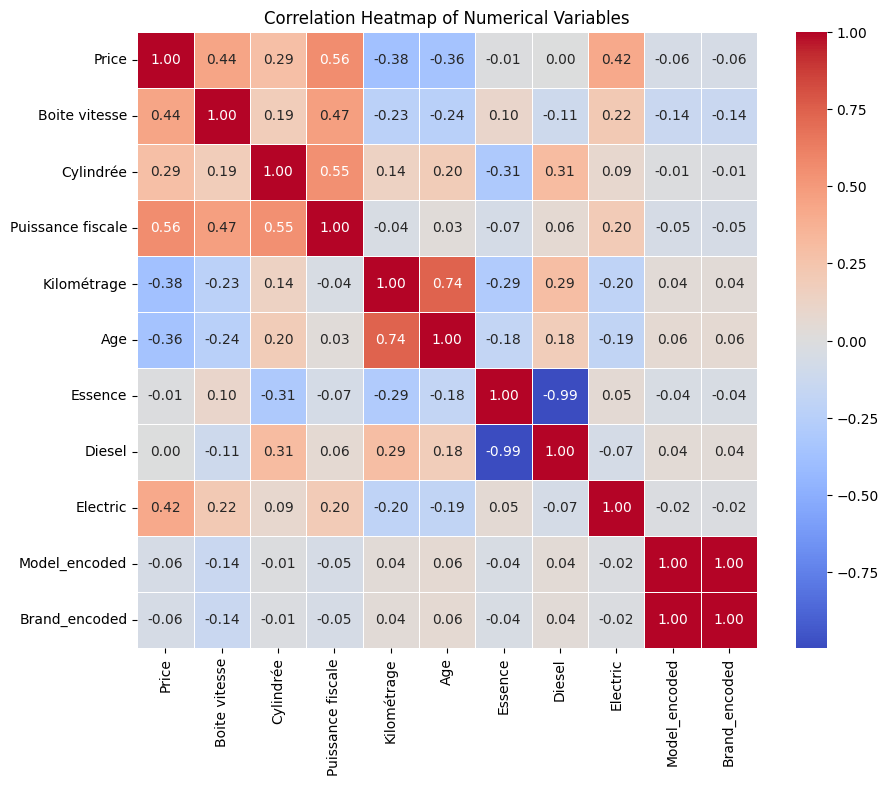

In [67]:

numerical_cols = ['Price', 'Boite vitesse', 'Cylindrée', 'Puissance fiscale','Kilométrage', 'Age', 
                  'Essence', 'Diesel', 'Electric', 'Model_encoded', 'Brand_encoded']

corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


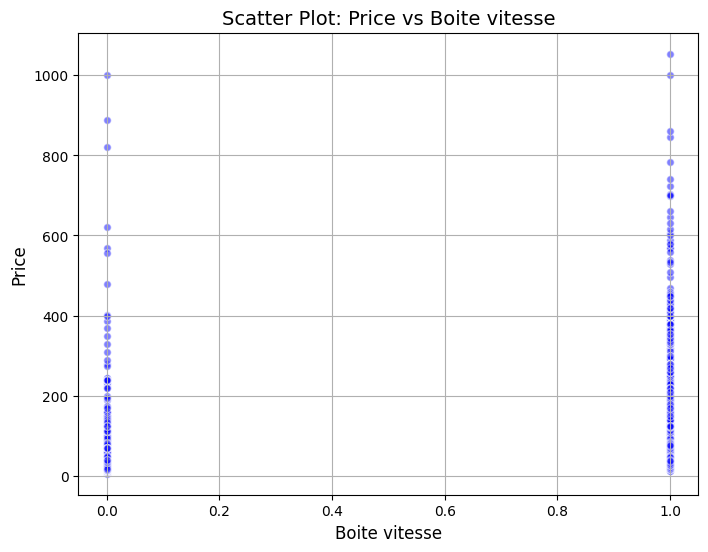

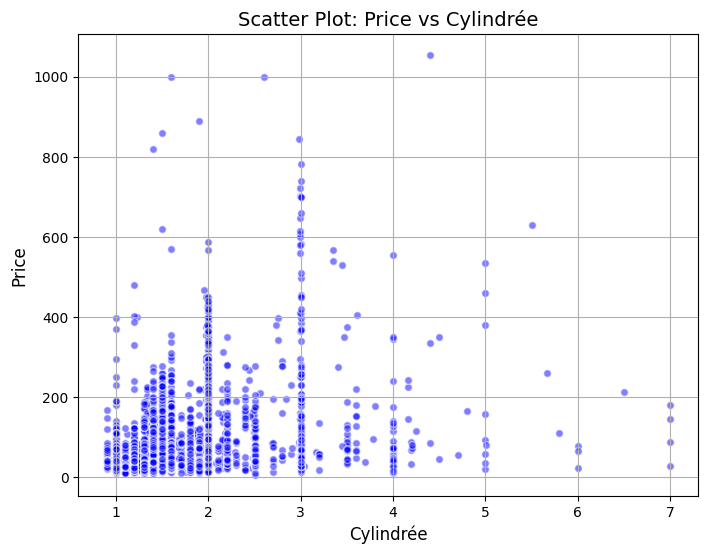

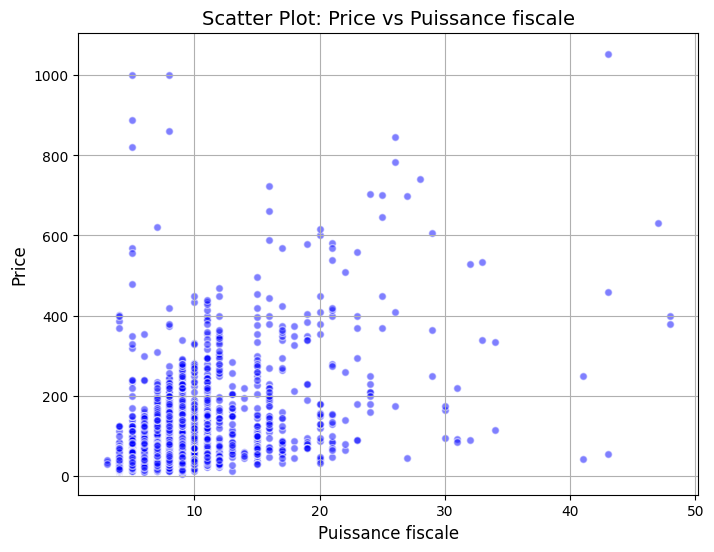

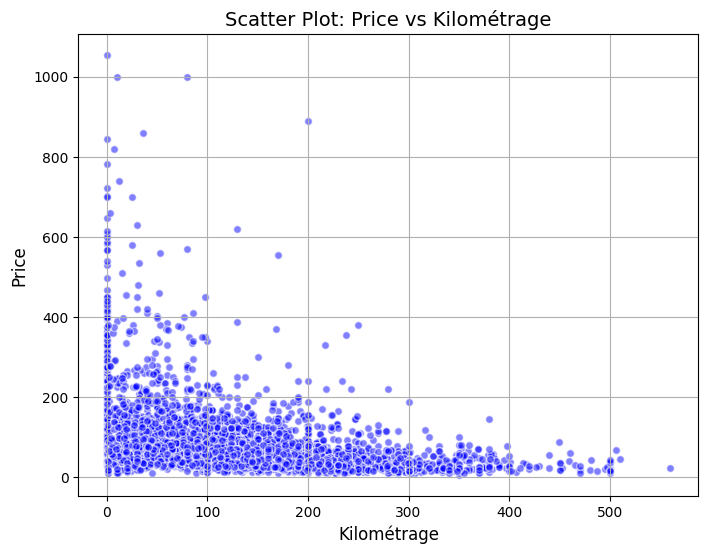

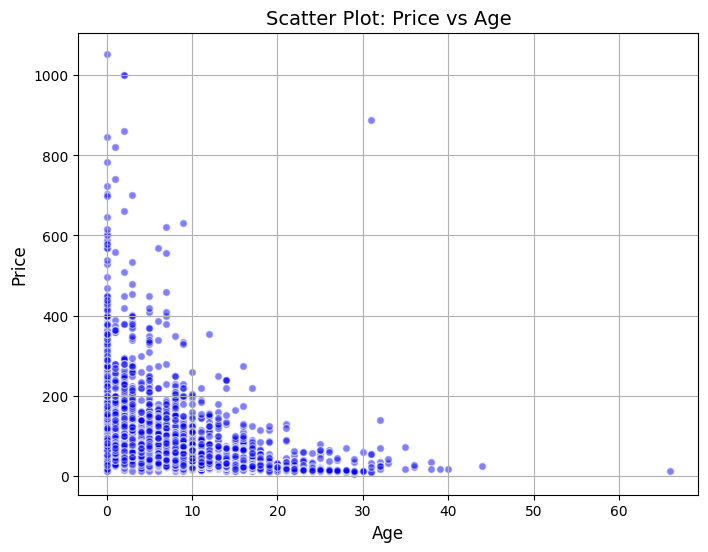

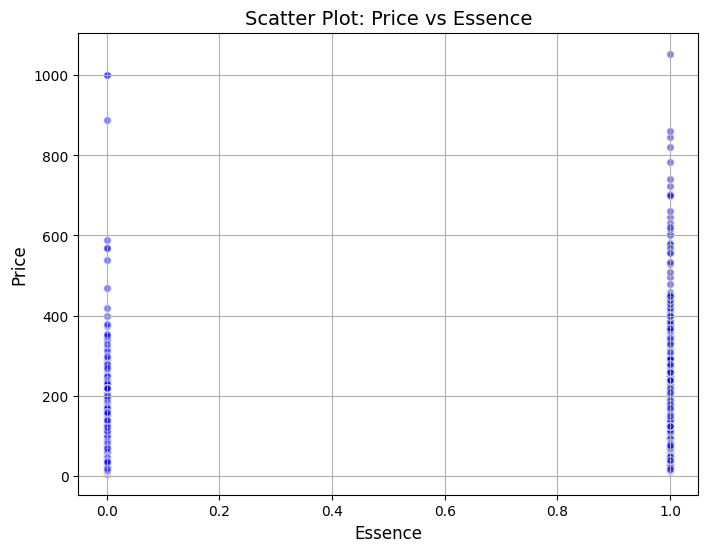

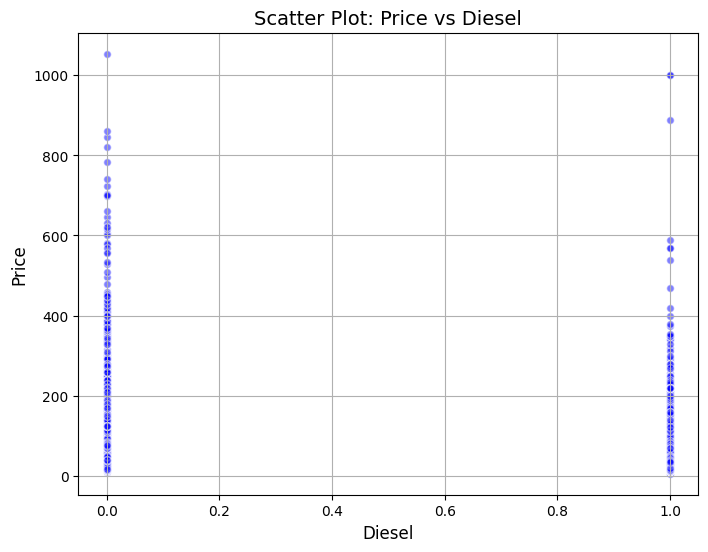

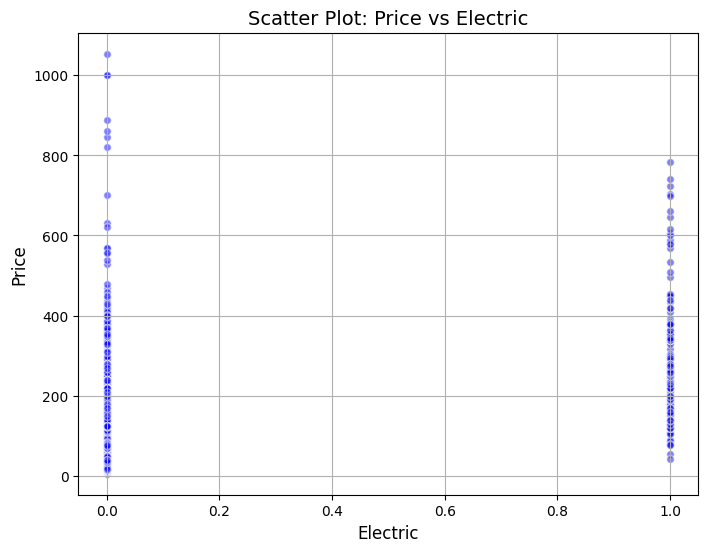

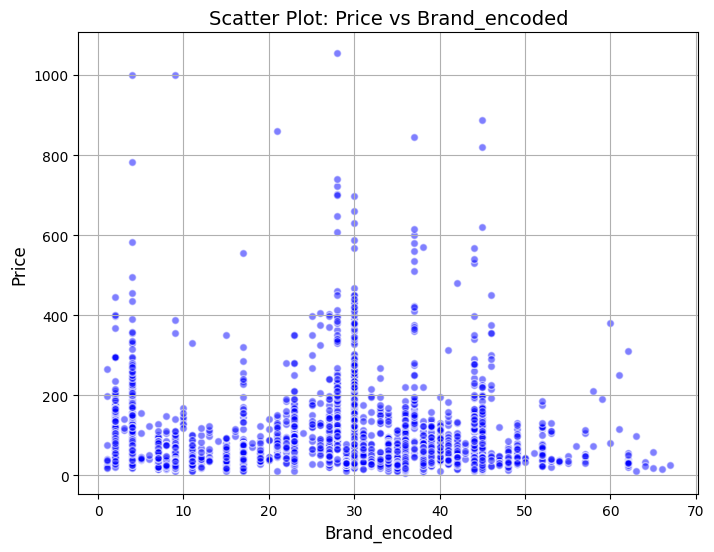

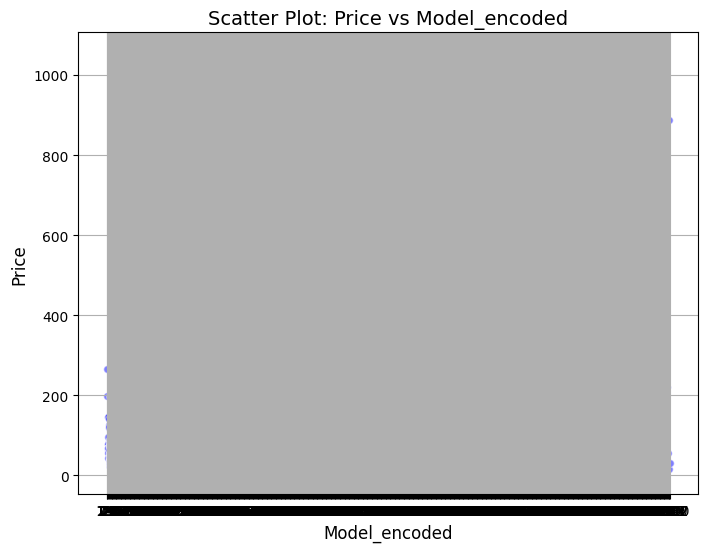

In [68]:
import matplotlib.pyplot as plt
Y=df['Price']
X=df.drop(columns=['Price'])

cols = X.columns

for column in cols:
    plt.figure(figsize=(8, 6))  # Optional: to control the size of the plot
    plt.scatter(X[column], Y, alpha=0.5, c='blue', edgecolors='w', s=30)  # Scatter plot
    plt.title(f'Scatter Plot: Price vs {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.grid(True)
    plt.show()  # Show the plot for the current feature